In [1]:
import tensorflow as tf
import os
import librosa
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.losses import sparse_categorical_crossentropy
from tensorflow.python.client import device_lib


os.environ["CUDA_VISIBLE_DEVICES"] = "0"
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 4915447691823349050
xla_global_id: -1
]


In [2]:
# import os
# import librosa
# import numpy as np
# import pandas as pd
# from sklearn.model_selection import train_test_split

# # 소리 파일이 저장된 디렉토리 경로
# directory = "./audio"

# # 데이터 프레임을 생성하여 데이터를 저장할 준비를 합니다.
# data = pd.DataFrame(columns=["feature", "label"])
# adddata = pd.DataFrame(columns=["feature", "label"])
# label_list = {0: 0, 1: 1, 3: 2, 8: 3}

# # 현재 디렉토리와 그 하위의 모든 폴더에 대해 순회합니다.
# y, sr = librosa.load("env.wav")
# for i in range(0, len(y)//sr):
#     mfcc = librosa.feature.mfcc(y=y[sr*i:sr*(i+1)],sr=sr, n_mfcc=20)
#     adddata = pd.DataFrame({"feature":[mfcc], "label":0})
#     data=pd.concat([data,adddata])
# for root, dirs, files in os.walk(directory):
#     # 각 폴더에 있는 파일에 대해 처리합니다.
#     for filename in files:
#         # print(filename)
#         if filename.endswith(".wav") and (
#             int(filename.split("-")[1]) in (1, 3, 8)
#         ):  # WAV 파일인 경우에만 처리합니다.
#             label = int(filename.split("-")[1])  # 파일 이름 파싱해서 라벨 추출
#             file_path = os.path.join(root, filename)
#             y, sr = librosa.load(file_path)  # 소리 파일 불러오기
#             # 1초 단위로 소리를 데이터프레임에 추가
#             # print(sr)
#             for i in range(0, len(y) // sr):
#                 mfcc = librosa.feature.mfcc(
#                     y=y[sr * i : sr * (i + 1)], sr=sr, n_mfcc=20
#                 )
#                 adddata = pd.DataFrame(
#                     {"feature": [mfcc], "label": [label_list[label]]}
#                 )
#                 # print("add data : ", adddata)
#                 data = pd.concat([data, adddata])

# # 머신러닝 모델에 사용할 트레이닝 셋과 테스트 셋을 생성합니다.
# # X = np.array(data["feature"].tolist())
# # y = np.array(data["label"].tolist())

# # 데이터를 트레이닝 셋과 테스트 셋으로 분할합니다.
# # X_train, X_test, y_train, y_test = train_test_split(
# #     X, y, test_size=0.3, random_state=42
# # )

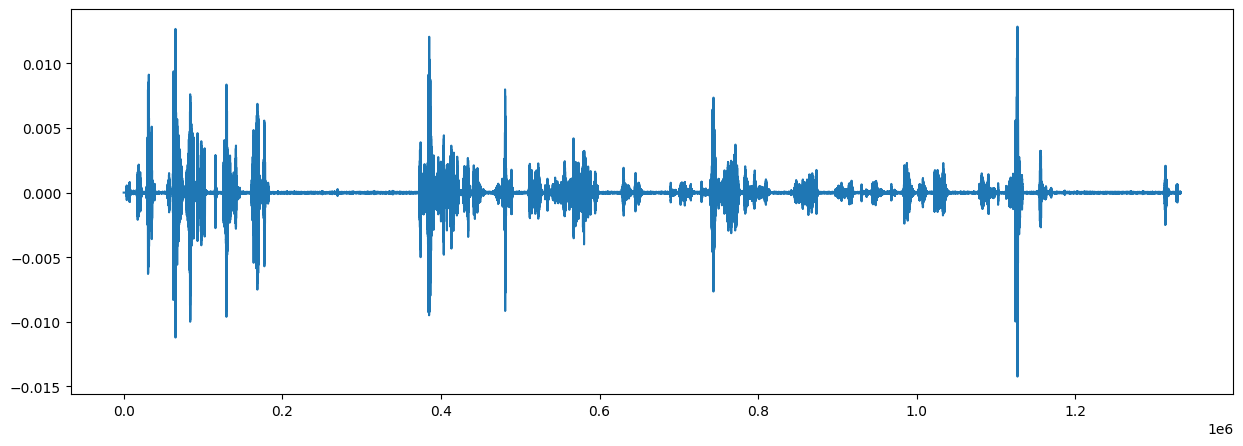

In [3]:
y, sr = librosa.load("env.wav")
plt.figure(figsize=(15, 5))
plt.plot(y)
plt.show()

In [4]:
directory = "./audio"

data = pd.DataFrame(columns=["feature", "label"])
label_list = {0: 0, 1: 1, 3: 2, 8: 3}

y, sr = librosa.load("myenv.wav")
for i in range(0, len(y) // (sr // 1)):
    mfcc = librosa.feature.mfcc(y=y[sr // 1 * i : sr // 1 * (i + 1)], sr=sr, n_mfcc=20)
    adddata = pd.DataFrame({"feature": [mfcc], "label": 0})
    data = pd.concat([data, adddata])

for root, dirs, files in os.walk(directory):
    for filename in files:
        if filename.endswith(".wav") and (int(filename.split("-")[1]) in (1, 3, 8)):
            label = int(filename.split("-")[1])
            file_path = os.path.join(root, filename)
            y, sr = librosa.load(file_path)
            for i in range(0, len(y) // (sr // 1)):
                segment = y[(sr // 1) * i : (sr // 1) * (i + 1)]
                if len(segment) == sr // 1:
                    mfcc = librosa.feature.mfcc(y=segment, sr=sr, n_mfcc=20)
                    adddata = pd.DataFrame(
                        {"feature": [mfcc], "label": [label_list[label]]}
                    )
                    data = pd.concat([data, adddata])

In [5]:
label_list[8]

3

In [3]:
def Mel_S(y, sr):
    S = librosa.feature.melspectrogram(y=y)

    print("Wav length: {}, Mel_S shape:{}".format(len(y) / sr, np.shape(S)))

    plt.figure(figsize=(10, 4))
    librosa.display.specshow(
        librosa.power_to_db(S, ref=np.max), y_axis="mel", sr=sr, x_axis="time"
    )
    plt.colorbar(format="%+2.0f dB")
    plt.title("Mel-Spectrogram")
    plt.tight_layout()
    plt.savefig("Mel-Spectrogram example.png")
    plt.show()
    plt.clf()
    return S

Wav length: 1.0, Mel_S shape:(128, 44)


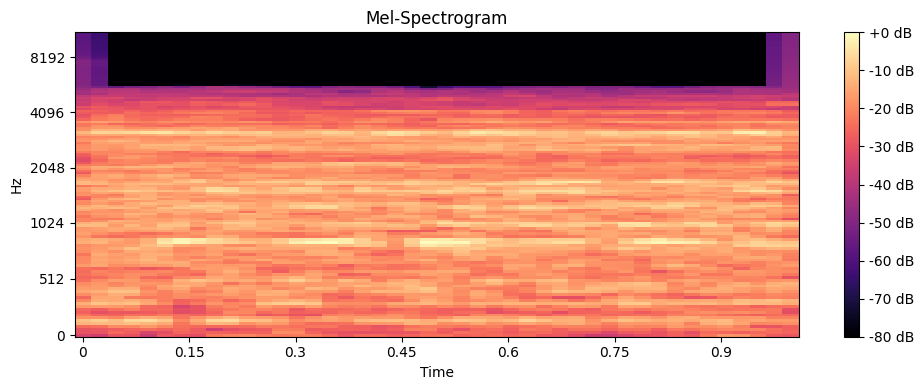

Wav length: 1.0, Mel_S shape:(128, 44)


<Figure size 640x480 with 0 Axes>

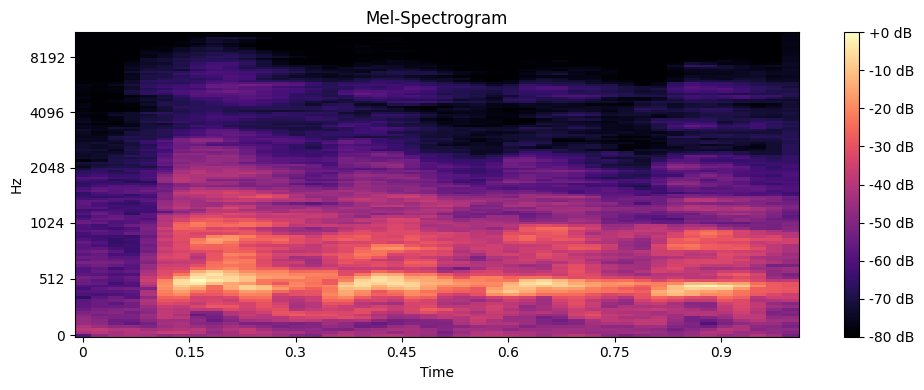

Wav length: 1.0, Mel_S shape:(128, 44)


<Figure size 640x480 with 0 Axes>

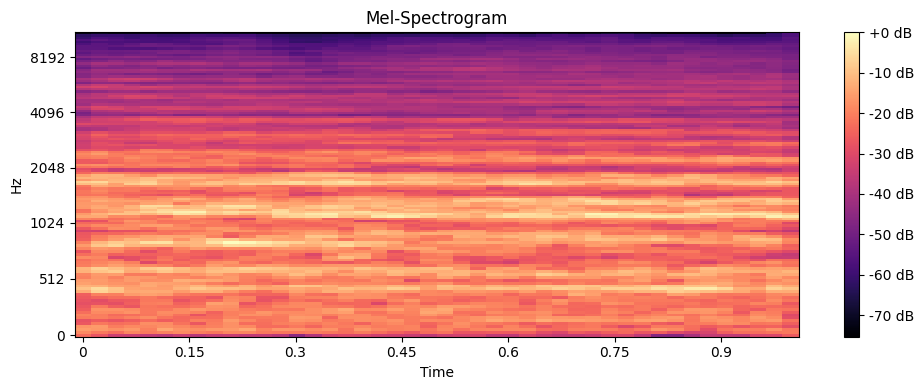

Wav length: 1.0, Mel_S shape:(128, 44)


<Figure size 640x480 with 0 Axes>

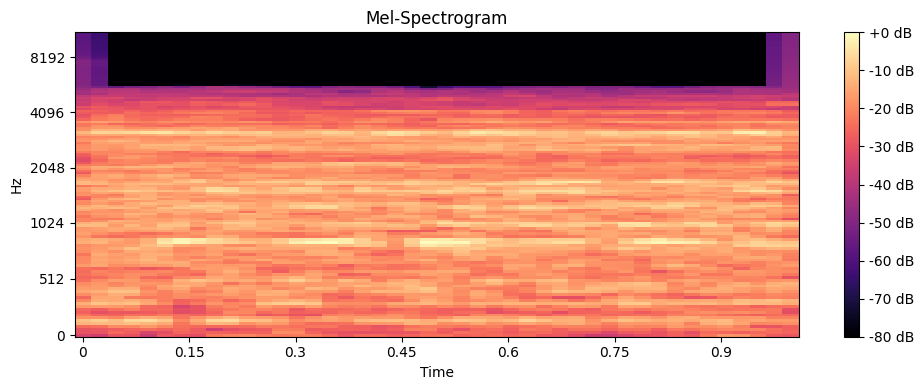

array([[2.29160115e-03, 1.42717268e-03, 5.44087496e-03, ...,
        2.46682875e-02, 7.82345049e-03, 6.64125336e-03],
       [5.27384691e-03, 5.62876277e-03, 1.46045256e-02, ...,
        1.42140882e-02, 1.57192703e-02, 1.13428105e-02],
       [5.31510031e-03, 5.99767966e-03, 8.50789435e-03, ...,
        4.16705571e-02, 1.76894069e-02, 1.06453281e-02],
       ...,
       [7.97524172e-06, 1.98254770e-06, 2.04707831e-15, ...,
        1.26333365e-15, 1.02076174e-05, 5.04206837e-05],
       [7.85585871e-06, 1.95318353e-06, 1.60459857e-15, ...,
        2.18531112e-15, 1.01034157e-05, 4.99060006e-05],
       [7.78205776e-06, 1.93502365e-06, 1.54003571e-15, ...,
        3.56719710e-15, 1.00341658e-05, 4.95639470e-05]], dtype=float32)

<Figure size 640x480 with 0 Axes>

In [5]:
Mel_S(np.array(a[:22050]), 22050)
Mel_S(np.array(b[22050 * 2 : 22050 * 3]), 22050)
Mel_S(np.array(c[:22050]), 22050)
Mel_S(np.array(d[:22050]), 22050)

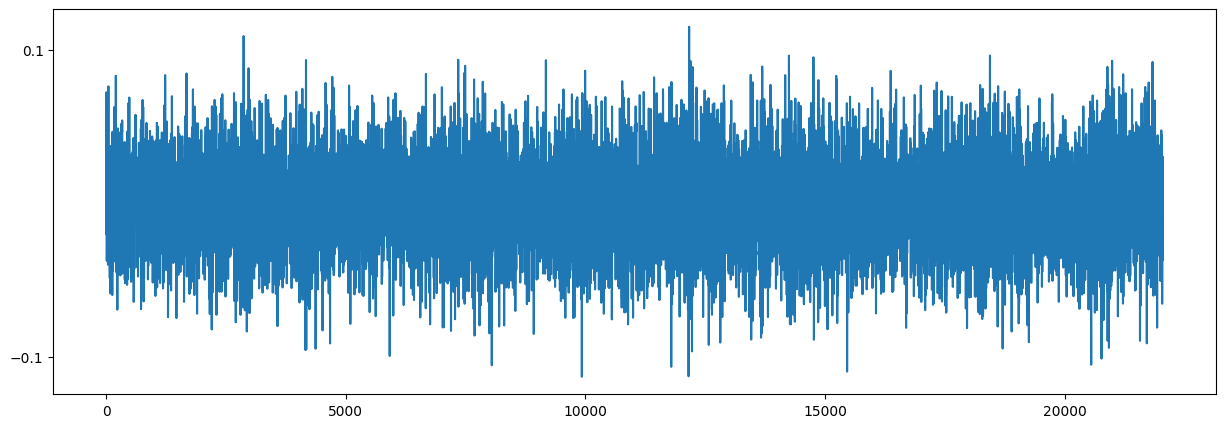

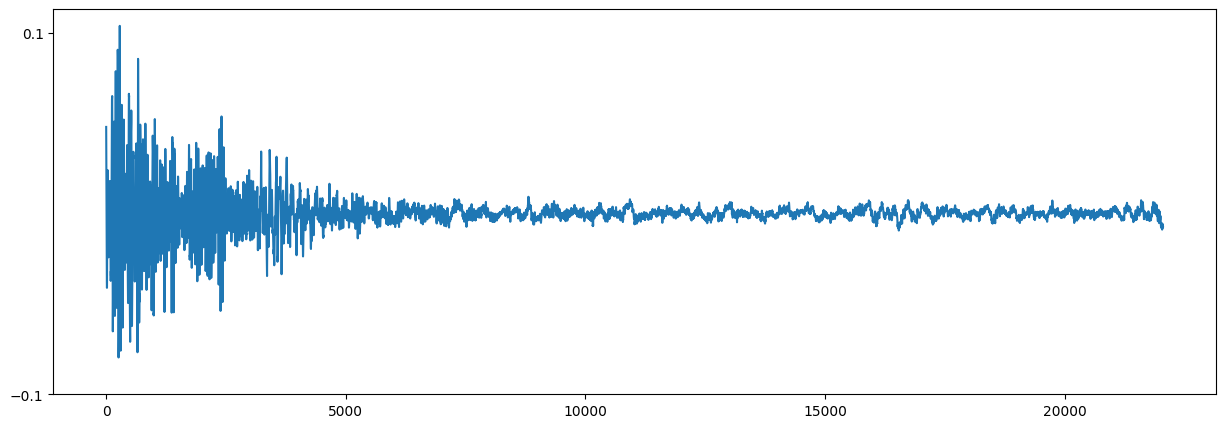

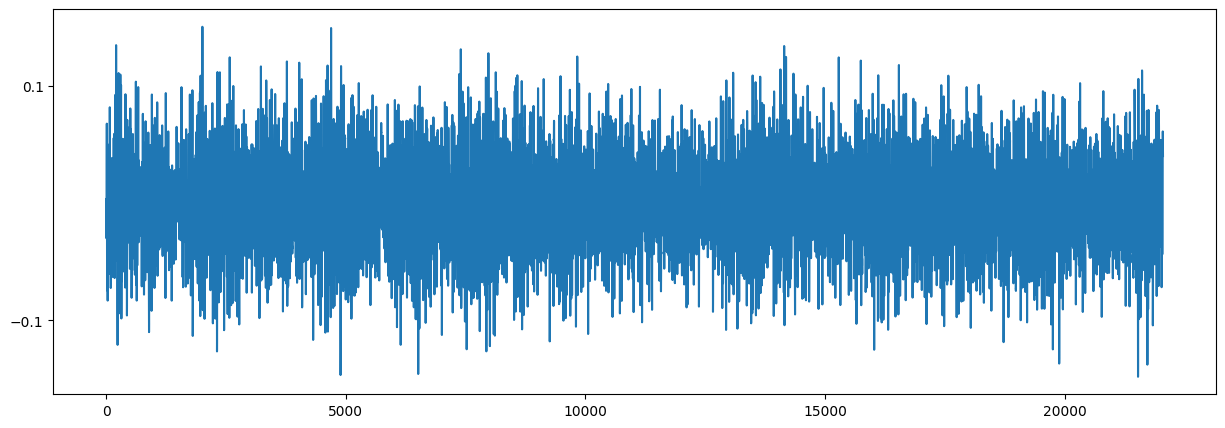

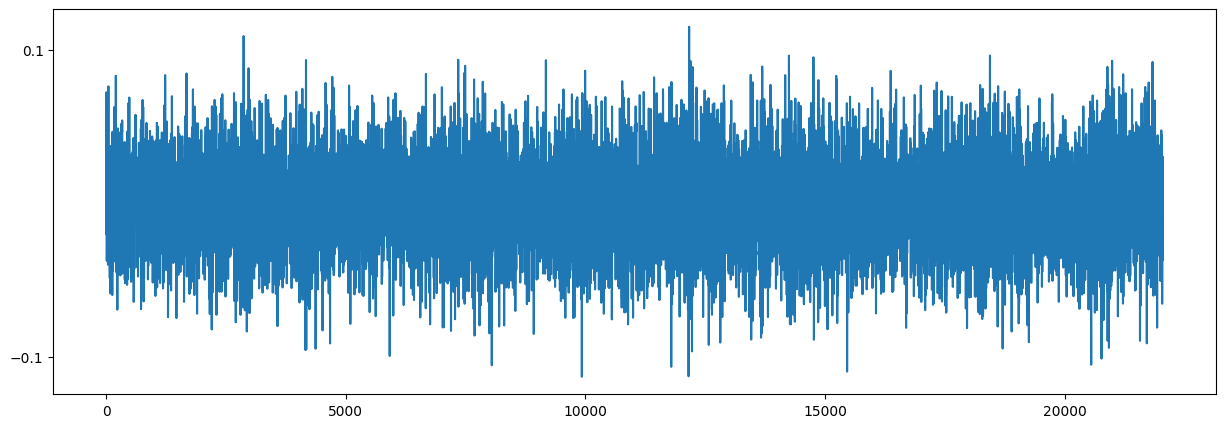

<Figure size 640x480 with 0 Axes>

In [6]:
a, sr = librosa.load("./72567-1-2-1.wav")
b, sr = librosa.load("./7383-3-0-1.wav")
c, sr = librosa.load("./102871-8-0-6.wav")
d, sr = librosa.load("./test.wav")

plt.figure(figsize=(15, 5))
plt.plot(a[:22050])
plt.yticks([-0.1, 0.1])
plt.show()
plt.figure(figsize=(15, 5))
plt.plot(b[22050 * 1 : 22050 * 2])
plt.yticks([-0.1, 0.1])
plt.show()
plt.figure(figsize=(15, 5))
plt.plot(c[:22050])
plt.yticks([-0.1, 0.1])
plt.show()
plt.figure(figsize=(15, 5))
plt.plot(d[:22050])
plt.yticks([-0.1, 0.1])
plt.show()
# Mel_S(np.array(array_data[:22050]),22050)
plt.clf()

Wav length: 0.31, Mel_S shape:(128, 10)


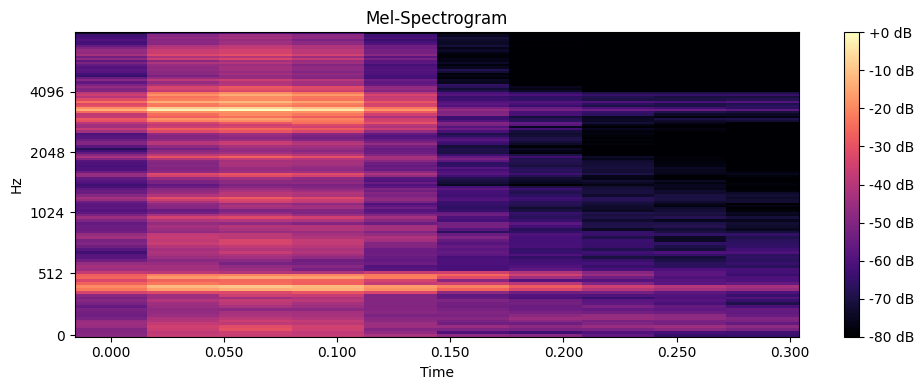

Wav length: 4.0, Mel_S shape:(128, 126)


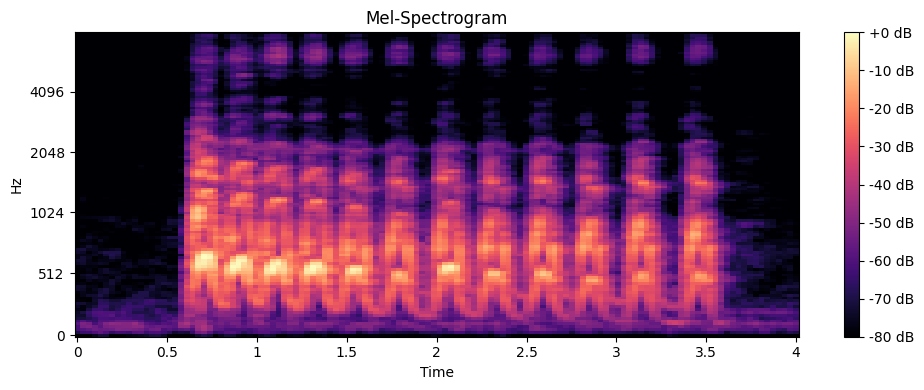

Wav length: 4.0, Mel_S shape:(128, 126)


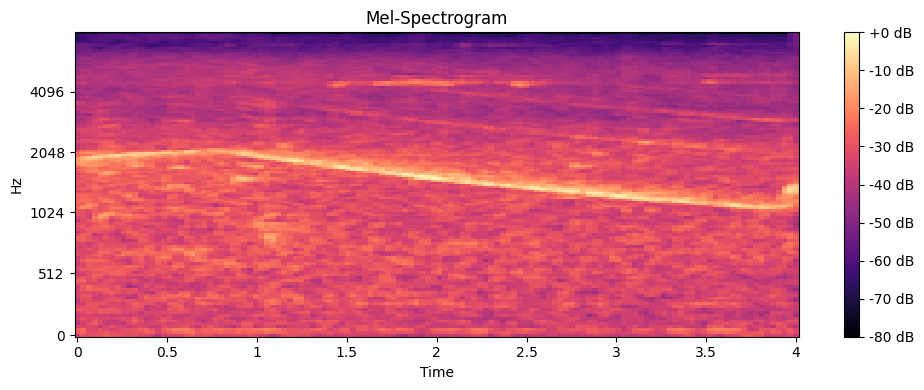

Wav length: 4.0, Mel_S shape:(128, 126)


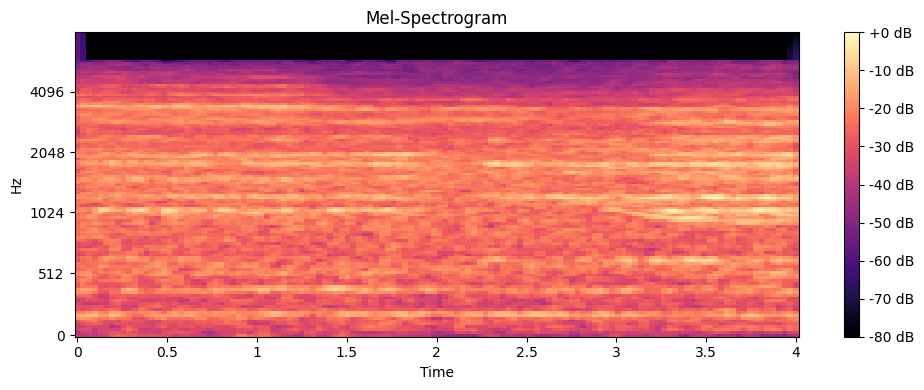

In [9]:
def Mfcc_S(wav_file):
    # mel-spectrogram
    y, sr = librosa.load(wav_file, sr=16000)

    S = librosa.feature.melspectrogram(y=y)

    print("Wav length: {}, Mel_S shape:{}".format(len(y) / sr, np.shape(S)))

    plt.figure(figsize=(10, 4))
    librosa.display.specshow(
        librosa.power_to_db(S, ref=np.max), y_axis="mel", sr=sr, x_axis="time"
    )
    plt.colorbar(format="%+2.0f dB")
    plt.title("Mel-Spectrogram")
    plt.tight_layout()
    plt.savefig("Mel-Spectrogram example.png")
    plt.show()

    return S


man_original_data = "./audio/fold1/162540-1-1-0.wav"
mel_spec = Mfcc_S(man_original_data)
man_original_data = "./audio/fold1/101415-3-0-3.wav"
mel_spec = Mfcc_S(man_original_data)
man_original_data = "./audio/fold1/106905-8-0-3.wav"
mel_spec = Mfcc_S(man_original_data)
man_original_data = "./test.wav"
mel_spec = Mfcc_S(man_original_data)

In [10]:
# 머신러닝 모델에 사용할 트레이닝 셋과 테스트 셋을 생성합니다.
X = np.array(data["feature"].tolist())
y = np.array(data["label"].tolist())

In [11]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

In [12]:
X_train.shape, X_test.shape

((5760, 20, 44), (1920, 20, 44))

In [13]:
cnn_model = Sequential()
cnn_model.add(
    Conv2D(
        filters=64,
        kernel_size=(3, 3),
        input_shape=(20, 44, 1),
        strides=(1, 1),
        padding="same",
        activation="relu",
    )
)
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))

cnn_model.add(
    Conv2D(
        filters=128,
        kernel_size=(3, 3),
        strides=(1, 1),
        padding="same",
        activation="relu",
    )
)
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))

cnn_model.add(
    Conv2D(
        filters=256,
        kernel_size=(3, 3),
        strides=(1, 1),
        padding="same",
        activation="relu",
    )
)
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))

cnn_model.add(
    Conv2D(
        filters=128,
        kernel_size=(3, 3),
        strides=(1, 1),
        padding="same",
        activation="relu",
    )
)
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))
cnn_model.add(Flatten())
cnn_model.add(Dense(128, activation="relu"))
cnn_model.add(Dense(4, activation="softmax"))
cnn_model.summary()

c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 20, 44, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 10, 22, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 10, 22, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 11, 128)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 5, 11, 256)     │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 2, 5, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 2, 5, 128)      │       295,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 1, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 698,116 (2.66 MB)

 Trainable params: 698,116 (2.66 MB)

 Non-trainable params: 0 (0.00 B)

In [14]:
# 컴파일
cnn_model.compile(
    loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"]
)

In [15]:
cnn_his = cnn_model.fit(
    X_train, y_train, validation_split=0.3, epochs=50, batch_size=64
)

Epoch 1/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - accuracy: 0.5686 - loss: 4.5029 - val_accuracy: 0.8693 - val_loss: 0.3075
Epoch 2/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - accuracy: 0.8985 - loss: 0.2751 - val_accuracy: 0.9213 - val_loss: 0.2154
Epoch 3/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - accuracy: 0.9393 - loss: 0.1771 - val_accuracy: 0.9283 - val_loss: 0.1749
Epoch 4/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - accuracy: 0.9484 - loss: 0.1377 - val_accuracy: 0.9456 - val_loss: 0.1594
Epoch 5/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - accuracy: 0.9616 - loss: 0.1135 - val_accuracy: 0.9468 - val_loss: 0.1429
Epoch 6/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - accuracy: 0.9598 - loss: 0.1069 - val_accuracy: 0.9387 - val_loss: 0.1718
Epoch 7/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.9790 - loss: 0.0613 - val_accuracy: 0.9618 - val_loss: 0.1131
Epoch 8/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - accuracy: 0.9857 - loss: 0.0410 - val_accuracy: 0.

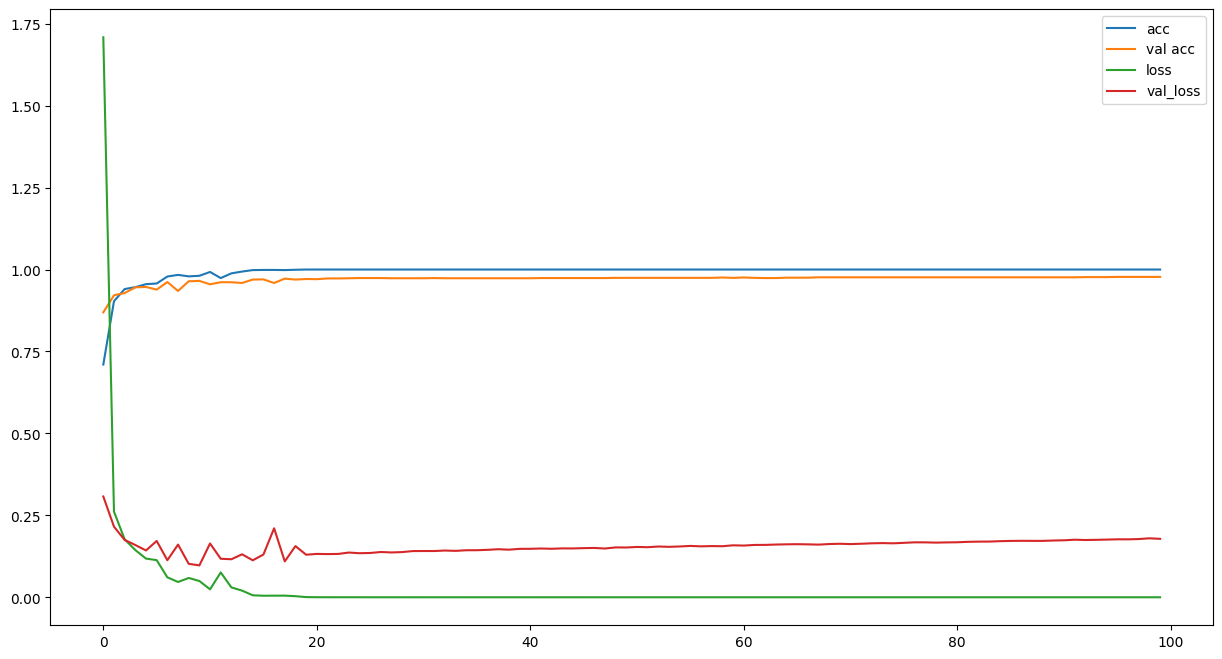

In [16]:
plt.figure(figsize=(15, 8))
plt.plot(cnn_his.history["accuracy"], label="acc")
plt.plot(cnn_his.history["val_accuracy"], label="val acc")
plt.plot(cnn_his.history["loss"], label="loss")
plt.plot(cnn_his.history["val_loss"], label="val_loss")
plt.legend()
plt.show()
cnn_model.save("neomokbo.h5")

In [17]:
np.unique(X_test)

array([-1131.3708 , -1119.3545 , -1099.8733 , ...,   263.5885 ,
         264.60205,   265.39886], dtype=float32)

In [18]:
X_test[0].shape, X_test.shape
type(X_test[0])

numpy.ndarray

In [19]:
def CutSound1sec(datas, sr):
    data = pd.DataFrame(columns=["feature", "label"])
    adddata = pd.DataFrame(columns=["feature", "label"])
    for i in range(0, len(datas) // sr):
        mfcc = librosa.feature.mfcc(y=datas[sr * i : sr * (i + 1)], sr=sr, n_mfcc=20)
        adddata = pd.DataFrame({"feature": [mfcc], "label": [label_list[label]]})
        print("add data : ", adddata)
        data = pd.concat([data, adddata])
    return data

In [20]:
def CutSoundHalfSec(datas, sr):
    data = pd.DataFrame(columns=["feature", "label"])
    adddata = pd.DataFrame(columns=["feature", "label"])
    for i in range(0, len(datas) // (sr // 1)):
        segment = datas[(sr // 1) * i : (sr // 1) * (i + 1)]
        if len(segment) == sr // 1:  # 0.5초 길이인 경우에만 처리
            mfcc = librosa.feature.mfcc(y=segment, sr=sr, n_mfcc=20)
            adddata = pd.DataFrame({"feature": [mfcc], "label": [label_list[label]]})
            data = pd.concat([data, adddata])
    return data

In [21]:
# 테스트 해보기
y, sr = librosa.load("./72567-1-2-1.wav")
test = CutSoundHalfSec(y, sr)

print(y)
print(test.feature.iloc[0])
pred_test = cnn_model.predict(np.array([test.feature.iloc[0]]))
print(
    int(pred_test[0][0] * 100),
    int(pred_test[0][1] * 100),
    int(pred_test[0][2] * 100),
    int(pred_test[0][3] * 100),
)
pred_test = cnn_model.predict(np.array([test.feature.iloc[1]]))
print(
    int(pred_test[0][0] * 100),
    int(pred_test[0][1] * 100),
    int(pred_test[0][2] * 100),
    int(pred_test[0][3] * 100),
)
pred_test = cnn_model.predict(np.array([test.feature.iloc[2]]))
print(
    int(pred_test[0][0] * 100),
    int(pred_test[0][1] * 100),
    int(pred_test[0][2] * 100),
    int(pred_test[0][3] * 100),
)
pred_test = cnn_model.predict(np.array([test.feature.iloc[3]]))
print(
    int(pred_test[0][0] * 100),
    int(pred_test[0][1] * 100),
    int(pred_test[0][2] * 100),
    int(pred_test[0][3] * 100),
)

[-0.01970423 -0.00350878  0.03180356 ... -0.00983079  0.00941168
  0.00736577]
[[-2.46036102e+02 -2.38365372e+02 -2.82268341e+02 -2.77687714e+02
  -2.80708435e+02 -2.79635529e+02 -2.81799042e+02 -2.81769836e+02
  -2.72790649e+02 -2.73200226e+02 -2.76596558e+02 -2.80380341e+02
  -2.78850647e+02 -2.82255951e+02 -2.78878265e+02 -2.81131104e+02
  -2.85741028e+02 -2.82057587e+02 -2.87404297e+02 -2.85556000e+02
  -2.79344299e+02 -2.81699738e+02 -2.81292511e+02 -2.79383514e+02
  -2.74745392e+02 -2.79842285e+02 -2.78712616e+02 -2.77276581e+02
  -2.80813904e+02 -2.78980560e+02 -2.79251556e+02 -2.85900909e+02
  -2.88581421e+02 -2.80633209e+02 -2.82056122e+02 -2.82903198e+02
  -2.76974670e+02 -2.79554077e+02 -2.79785858e+02 -2.79935394e+02
  -2.78497284e+02 -2.79763794e+02 -2.24841003e+02 -2.28982162e+02]
 [ 1.21043152e+02  1.41049423e+02  2.01780075e+02  2.06273224e+02
   2.02153442e+02  2.01406250e+02  1.96910706e+02  1.93307922e+02
   2.02306488e+02  2.03975525e+02  2.01494415e+02  2.02361282e

In [22]:
# 테스트 해보기
y, sr = librosa.load("./7383-3-0-1.wav")
test = CutSoundHalfSec(y, sr)

print(y)
print(test.feature.iloc[0])
pred_test = cnn_model.predict(np.array([test.feature.iloc[0]]))
print(
    int(pred_test[0][0] * 100),
    int(pred_test[0][1] * 100),
    int(pred_test[0][2] * 100),
    int(pred_test[0][3] * 100),
)
pred_test = cnn_model.predict(np.array([test.feature.iloc[1]]))
print(
    int(pred_test[0][0] * 100),
    int(pred_test[0][1] * 100),
    int(pred_test[0][2] * 100),
    int(pred_test[0][3] * 100),
)
pred_test = cnn_model.predict(np.array([test.feature.iloc[2]]))
print(
    int(pred_test[0][0] * 100),
    int(pred_test[0][1] * 100),
    int(pred_test[0][2] * 100),
    int(pred_test[0][3] * 100),
)
pred_test = cnn_model.predict(np.array([test.feature.iloc[3]]))
print(
    int(pred_test[0][0] * 100),
    int(pred_test[0][1] * 100),
    int(pred_test[0][2] * 100),
    int(pred_test[0][3] * 100),
)

[ 0.01675954  0.02307146  0.01842667 ... -0.00196145 -0.00163956
 -0.00171084]
[[-3.21622498e+02 -2.56845398e+02 -2.46721390e+02 -2.70895172e+02
  -2.90664856e+02 -3.01911896e+02 -3.28096802e+02 -3.50205078e+02
  -3.56357910e+02 -3.73638092e+02 -3.88647430e+02 -4.00991852e+02
  -4.18603424e+02 -4.35866058e+02 -4.46229736e+02 -4.59911743e+02
  -4.71557648e+02 -4.68737549e+02 -4.65651733e+02 -4.70261047e+02
  -4.72115479e+02 -4.67858154e+02 -4.77026367e+02 -4.83839203e+02
  -4.85199371e+02 -4.92414673e+02 -4.88237122e+02 -4.89121124e+02
  -4.92909943e+02 -4.87290985e+02 -4.77179321e+02 -4.80883606e+02
  -4.89346161e+02 -4.87144043e+02 -4.81775757e+02 -4.74576416e+02
  -4.65227142e+02 -3.94380035e+02 -3.24054291e+02 -2.83857544e+02
  -2.78527527e+02 -2.73165405e+02 -2.56692596e+02 -2.67483643e+02]
 [ 1.69207581e+02  1.67166321e+02  1.52388611e+02  1.48281281e+02
   1.70280212e+02  1.92995148e+02  1.92730194e+02  1.87961655e+02
   1.88665344e+02  1.80164856e+02  1.71787384e+02  1.63735382e


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
0 0 100 0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
0 0 100 0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
0 0 100 0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
0 0 100 0


In [23]:
# 테스트 해보기
y, sr = librosa.load("./102871-8-0-6.wav")
test = CutSoundHalfSec(y, sr)

print(test.feature.iloc[0])
pred_test = cnn_model.predict(np.array([test.feature.iloc[0]]))
print(
    int(pred_test[0][0] * 100),
    int(pred_test[0][1] * 100),
    int(pred_test[0][2] * 100),
    int(pred_test[0][3] * 100),
)
pred_test = cnn_model.predict(np.array([test.feature.iloc[1]]))
print(
    int(pred_test[0][0] * 100),
    int(pred_test[0][1] * 100),
    int(pred_test[0][2] * 100),
    int(pred_test[0][3] * 100),
)
pred_test = cnn_model.predict(np.array([test.feature.iloc[2]]))
print(
    int(pred_test[0][0] * 100),
    int(pred_test[0][1] * 100),
    int(pred_test[0][2] * 100),
    int(pred_test[0][3] * 100),
)
pred_test = cnn_model.predict(np.array([test.feature.iloc[3]]))
print(
    int(pred_test[0][0] * 100),
    int(pred_test[0][1] * 100),
    int(pred_test[0][2] * 100),
    int(pred_test[0][3] * 100),
)

[[-2.12322495e+02 -1.85576950e+02 -1.91935211e+02 -1.91138626e+02
  -1.84998657e+02 -1.82840469e+02 -1.88052292e+02 -1.87630249e+02
  -1.86118149e+02 -1.80026016e+02 -1.84747330e+02 -1.94687027e+02
  -1.94677612e+02 -1.93658264e+02 -1.94886917e+02 -1.88322723e+02
  -1.87884705e+02 -1.88764832e+02 -1.92894104e+02 -1.93689850e+02
  -1.98873734e+02 -1.91449936e+02 -1.88974655e+02 -1.94963348e+02
  -1.95270447e+02 -1.89937500e+02 -1.90439789e+02 -1.91830917e+02
  -1.91537140e+02 -1.95220062e+02 -1.93270615e+02 -1.89037811e+02
  -1.89446701e+02 -1.91577301e+02 -1.93546310e+02 -1.96255142e+02
  -1.98054733e+02 -1.98007935e+02 -1.96673355e+02 -1.98102554e+02
  -2.02843826e+02 -2.00412994e+02 -1.93501251e+02 -2.19910599e+02]
 [ 1.25737350e+02  1.25286850e+02  1.21008743e+02  1.20906654e+02
   1.19879463e+02  1.23453201e+02  1.21854645e+02  1.19994797e+02
   1.22136520e+02  1.23877274e+02  1.17556870e+02  1.21093132e+02
   1.28760574e+02  1.34389847e+02  1.35323669e+02  1.36941345e+02
   1.3495

In [24]:
# pred_test = cnn_model.predict(np.array([test.feature.iloc[3]]))
# pred_test = cnn_model.predict(np.array([X_test[0]]))

pred_xtest = cnn_model.predict(X_test)
print(pred_xtest.shape)
print(pred_xtest[0].shape)
print(pred_xtest[0][0].shape)
print(pred_xtest[0])
print(pred_xtest[0][0])
print(pred_xtest[:15][2])


for i in pred_xtest[:15]:
    print(int(i[0] * 100), int(i[1] * 100), int(i[2] * 100))

# print((pred_xtest[0][0]))

# for i in X_test[:100]:
#   print(i,"번째 예측 결과 : ",int(cnn_model.predict(np.array([i]))*100),"%")

# print((pred_test[0][0]))

60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
(1920, 4)
(4,)
()
[2.3798647e-28 6.5822291e-29 1.0000000e+00 1.8840800e-35]
2.3798647e-28
[9.1879324e-15 2.1846012e-09 9.1898090e-07 9.9999905e-01]
0 0 100
0 0 100
0 0 0
0 99 0
0 0 0
0 0 100
0 0 100
0 100 0
100 0 0
0 0 100
0 0 0
0 0 0
0 0 100
0 0 100
0 0 0


In [25]:
print("테스트 타입 : ", type(np.array(test.feature.iloc[:])))
print("테스트 : ", np.array(test.feature.iloc[:]))
print("X_test 타입 : ", type(X_test))
print("X_test : ", X_test)

테스트 타입 :  <class 'numpy.ndarray'>
테스트 :  [array([[-2.12322495e+02, -1.85576950e+02, -1.91935211e+02,
         -1.91138626e+02, -1.84998657e+02, -1.82840469e+02,
         -1.88052292e+02, -1.87630249e+02, -1.86118149e+02,
         -1.80026016e+02, -1.84747330e+02, -1.94687027e+02,
         -1.94677612e+02, -1.93658264e+02, -1.94886917e+02,
         -1.88322723e+02, -1.87884705e+02, -1.88764832e+02,
         -1.92894104e+02, -1.93689850e+02, -1.98873734e+02,
         -1.91449936e+02, -1.88974655e+02, -1.94963348e+02,
         -1.95270447e+02, -1.89937500e+02, -1.90439789e+02,
         -1.91830917e+02, -1.91537140e+02, -1.95220062e+02,
         -1.93270615e+02, -1.89037811e+02, -1.89446701e+02,
         -1.91577301e+02, -1.93546310e+02, -1.96255142e+02,
         -1.98054733e+02, -1.98007935e+02, -1.96673355e+02,
         -1.98102554e+02, -2.02843826e+02, -2.00412994e+02,
         -1.93501251e+02, -2.19910599e+02],
        [ 1.25737350e+02,  1.25286850e+02,  1.21008743e+02,
          1.209

In [26]:
def ShowSound(data):
    # mel-spectrogram
    y, sr = librosa.load(wav_file, sr=16000)

    S = librosa.feature.melspectrogram(y=y)

    print("Wav length: {}, Mel_S shape:{}".format(len(y) / sr, np.shape(S)))

    plt.figure(figsize=(10, 4))
    librosa.display.specshow(
        librosa.power_to_db(S, ref=np.max), y_axis="mel", sr=sr, x_axis="time"
    )
    plt.colorbar(format="%+2.0f dB")
    plt.title("Mel-Spectrogram")
    plt.tight_layout()
    plt.savefig("Mel-Spectrogram example.png")
    plt.show()

    return S

In [27]:
X_test.shape, test.feature.shape

((1920, 20, 44), (4,))

In [28]:
test.feature.T[0]

0    [[-212.3225, -185.57695, -191.93521, -191.1386...
0    [[-236.53563, -206.47366, -204.11517, -205.867...
0    [[-224.23273, -201.85583, -206.31422, -207.568...
0    [[-232.62915, -191.64328, -188.11464, -192.900...
Name: feature, dtype: object

In [29]:
print("X_test 타입 : ", type(X_test), X_test.shape)
print("X_test[] 타입 : ", type(X_test[0]), X_test[0].shape)
print("test 타입 : ", type(test), test.shape)
print("test.feature 타입 : ", type(test.feature), test.feature.shape)

X_test 타입 :  <class 'numpy.ndarray'> (1920, 20, 44)
X_test[] 타입 :  <class 'numpy.ndarray'> (20, 44)
test 타입 :  <class 'pandas.core.frame.DataFrame'> (4, 2)
test.feature 타입 :  <class 'pandas.core.series.Series'> (4,)


In [30]:
type(test.feature.iloc[0])  # numpy.ndarray
test.feature.iloc[0].shape  # (20, 44)
ntest = np.array(test.feature.iloc[:])
type(ntest)  # numpy.ndarray
ntest.shape  # (4,)
np.array([test.feature.iloc[0]]).shape  # (1, 20, 44)

(1, 20, 44)

In [31]:
import tensorflowjs as tfjs

ModuleNotFoundError: No module named 'tensorflowjs'

In [ ]:
print(tf.__version__)

2.15.0


In [ ]:
# 모델을 JSON 형식으로 변환
model_json = cnn_model.to_json()

# JSON 파일로 모델 저장
with open("my_model.json", "w") as json_file:
    json_file.write(model_json)